In [1]:
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt

%matplotlib inline

params = {'backend': 'agg',
'axes.labelsize': 16,
'font.size': 16,
'legend.fontsize': 14,
'xtick.labelsize': 14,
'ytick.labelsize': 14,
'text.usetex': False,
'figure.figsize': [10,6]}

In [4]:
data_file='data/query.csv'#la fuente de la información es https://earthquake.usgs.gov/earthquakes/search/
terremotos=pd.read_csv(data_file,header=0,sep=',')#leer archivo csv
terremotos['time']=pd.to_datetime(terremotos['time'], errors='coerce')

In [5]:
#los primeros 15 datos
terremotos.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2019-03-16 22:29:29.690,-3.1778,101.9538,91.37,5.1,mww,NaN,68.0,1.542,0.98,...,2019-03-16T22:49:12.040Z,"71km WNW of Curup, Indonesia",earthquake,6.3,5.6,0.066,22.0,reviewed,us,us
1,2019-03-16 18:06:15.410,-29.7724,-71.5882,53.35,5.1,mb,NaN,140.0,0.792,1.28,...,2019-03-16T19:47:46.086Z,"30km NW of Coquimbo, Chile",earthquake,4.8,6.3,0.083,47.0,reviewed,us,us
2,2019-03-16 17:54:33.460,-45.6255,-76.6713,9.93,4.9,mwr,NaN,134.0,3.096,0.91,...,2019-03-16T19:16:46.040Z,"Off the coast of Aisen, Chile",earthquake,4.3,5.0,0.078,16.0,reviewed,us,us
3,2019-03-16 15:46:28.430,-1.4246,120.2017,10.00,4.5,mb,NaN,127.0,2.584,1.22,...,2019-03-16T18:25:03.040Z,"50km W of Kasiguncu, Indonesia",earthquake,9.4,1.9,0.131,17.0,reviewed,us,us
4,2019-03-16 14:58:19.710,-7.0381,129.9149,112.22,4.8,mb,NaN,95.0,1.662,1.12,...,2019-03-16T18:21:38.040Z,"184km WNW of Saumlaki, Indonesia",earthquake,7.5,5.8,0.119,22.0,reviewed,us,us


In [6]:
terremotos.shape# arroja 22 columnas que puedenm ser analizadas y 98 registros de los ultimos 7 dias en todo el mundo
#un experimento mas importante seria cargar un intervalo más grande de tiempo

(98, 22)

In [8]:
#las columnas 
terremotos.columns.values
#elementos será el largo del index
print("elementos", len(terremotos.index))

elementos 98


Text(0,0.5,'Nº de terremotos')

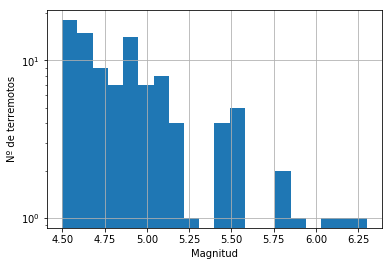

In [10]:
ax=terremotos['mag'].hist(bins=20)
ax.set_yscale('log')
ax.set_xlabel('Magnitud')
ax.set_ylabel('Nº de terremotos')
#la cantidad de terremotos disminuye a medida que la intensidad aumenta

In [11]:
#es posible hacer un filtro en este caso se filtrará la magnitud en 5.75
terremotos.query('mag>5.75')

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
17,2019-03-15 05:03:50.080,-17.8571,-65.8913,358.34,6.3,mww,NaN,23.0,2.650,1.04,...,2019-03-16T05:06:04.456Z,"28km S of Cliza, Bolivia",earthquake,7.8,6.0,0.051,37.0,reviewed,us,us
58,2019-03-11 16:25:51.540,-6.0611,148.9965,31.25,5.8,mww,NaN,20.0,3.660,1.12,...,2019-03-12T16:27:36.849Z,"63km WNW of Kandrian, Papua New Guinea",earthquake,7.4,3.5,0.071,19.0,reviewed,us,us
77,2019-03-10 18:04:59.060,58.3382,-31.9571,10.00,5.9,mww,NaN,21.0,7.774,0.87,...,2019-03-11T18:07:21.162Z,Reykjanes Ridge,earthquake,8.1,1.8,0.073,18.0,reviewed,us,us
82,2019-03-10 17:10:52.720,36.8522,142.3682,14.72,5.8,mww,NaN,51.0,1.616,0.48,...,2019-03-11T17:12:27.970Z,"134km E of Iwaki, Japan",earthquake,6.6,3.3,0.065,23.0,reviewed,us,us
88,2019-03-10 12:48:00.910,-10.1389,152.0544,10.00,6.1,mww,NaN,55.0,5.910,0.65,...,2019-03-11T12:50:11.339Z,"140km SSW of Kulumadau, Papua New Guinea",earthquake,7.1,1.4,0.071,19.0,reviewed,us,us
93,2019-03-10 08:12:25.730,-17.8313,-178.6620,567.38,6.2,mww,NaN,24.0,3.131,1.13,...,2019-03-11T14:27:44.292Z,"260km SE of Lambasa, Fiji",earthquake,7.6,6.5,0.068,21.0,reviewed,us,us


Text(0,0.5,'Nº de terremotos')

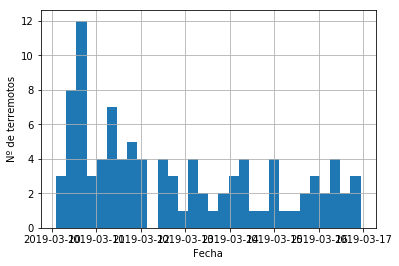

In [12]:
ax=terremotos['time'].hist(bins=30)
ax.set_xlabel('Fecha')
ax.set_ylabel('Nº de terremotos')

In [20]:
#actualización de archivo a los desde 2017
data_file='data/query.csv'#la fuente de la información es https://earthquake.usgs.gov/earthquakes/search/
terremotos=pd.read_csv(data_file,header=0,sep=',')#leer archivo csv
terremotos['time']=pd.to_datetime(terremotos['time'], errors='coerce')

Text(0,0.5,'Nº de terremotos')

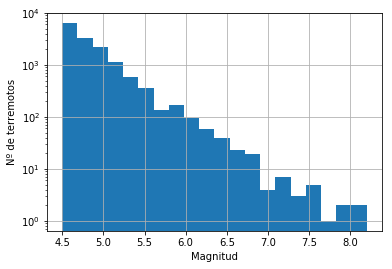

In [21]:
ax=terremotos['mag'].hist(bins=20)
ax.set_yscale('log')
ax.set_xlabel('Magnitud')
ax.set_ylabel('Nº de terremotos')

Text(0,0.5,'Nº de terremotos')

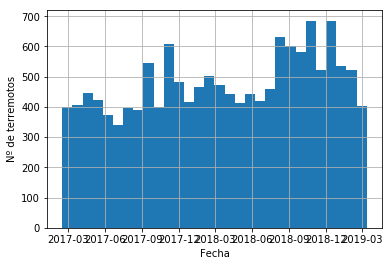

In [22]:
ax=terremotos['time'].hist(bins=30)
ax.set_xlabel('Fecha')
ax.set_ylabel('Nº de terremotos')

In [24]:
terremotos['mes']=terremotos['time'].dt.month#crea una columna mes en base a la columna time
terremotos['anio']=terremotos['time'].dt.year#crea una columna anio en base a la columna time
terremotos_count=terremotos.groupby(by=['anio','mes'])['mag'].count()#agrupo en base mes
print(terremotos_count)

anio  mes
2017  2      235
      3      483
      4      517
      5      536
      6      393
      7      488
      8      461
      9      624
      10     520
      11     733
      12     526
2018  1      557
      2      563
      3      550
      4      486
      5      556
      6      509
      7      558
      8      797
      9      691
      10     839
      11     633
      12     813
2019  1      648
      2      507
      3      180
Name: mag, dtype: int64


Text(0,0.5,'Nº de terremotos')

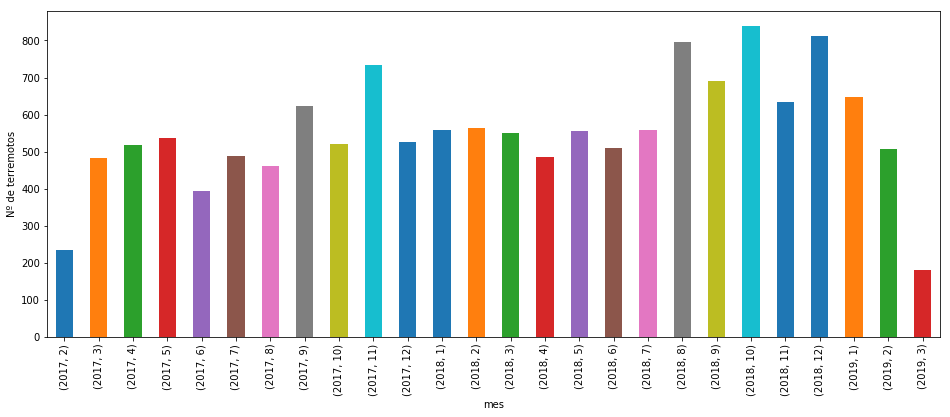

In [25]:
fig, ax = plt.subplots(figsize=(16,6))
ax=terremotos_count.plot(kind="bar")
ax.set_xlabel('mes')
ax.set_ylabel('Nº de terremotos')

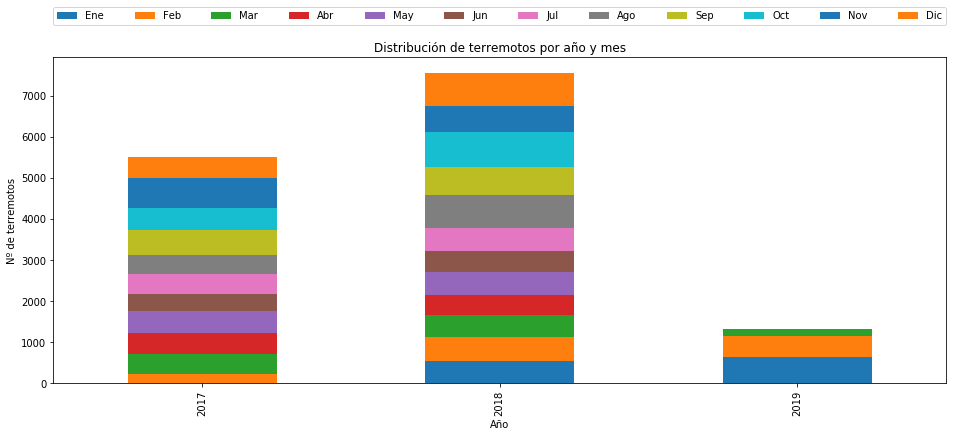

In [27]:
fig, ax = plt.subplots(figsize=(16,6))
terremotos_count.unstack().plot(ax=ax, kind='bar',stacked=True,title="Distribución de terremotos por año y mes")
ax.set_xlabel("Año")
ax.set_ylabel("Nº de terremotos")
ax.legend(["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"], bbox_to_anchor=(0., 1.1, 1., .102), loc=3, ncol=12, mode="expand", borderaxespad=0.)

In [29]:
terremotos.query('anio==2018').groupby([terremotos['anio'],terremotos['mes']])['mag'].count()

anio  mes
2018  1      557
      2      563
      3      550
      4      486
      5      556
      6      509
      7      558
      8      797
      9      691
      10     839
      11     633
      12     813
Name: mag, dtype: int64

In [30]:
terremoto_query=terremotos.query('anio==2018 & mes==3').groupby(by=['place'])['mag'].count().sort_values(ascending=False)
print(terremoto_query)#terremoto de un mes especifico
print("\nNumero de registros: ", len(terremoto_query.index))



place
South of the Fiji Islands                10
Western Indian-Antarctic Ridge            5
Southeast Indian Ridge                    4
Mid-Indian Ridge                          4
North of Ascension Island                 4
Central Mid-Atlantic Ridge                4
Southeast of Easter Island                3
Carlsberg Ridge                           3
Izu Islands, Japan region                 3
104km SW of Porgera, Papua New Guinea     3
121km SW of Porgera, Papua New Guinea     3
113km SW of Porgera, Papua New Guinea     2
99km W of Mendi, Papua New Guinea         2
98km SW of Porgera, Papua New Guinea      2
76km W of Mendi, Papua New Guinea         2
69km WSW of Mendi, Papua New Guinea       2
111km SW of Porgera, Papua New Guinea     2
297km N of Chichi-shima, Japan            2
Chagos Archipelago region                 2
91km W of Mendi, Papua New Guinea         2
109km WSW of Mendi, Papua New Guinea      2
220km E of Amahai, Indonesia              2
112km WSW of Mendi, Papua 

Text(0,0.5,'Latitud')

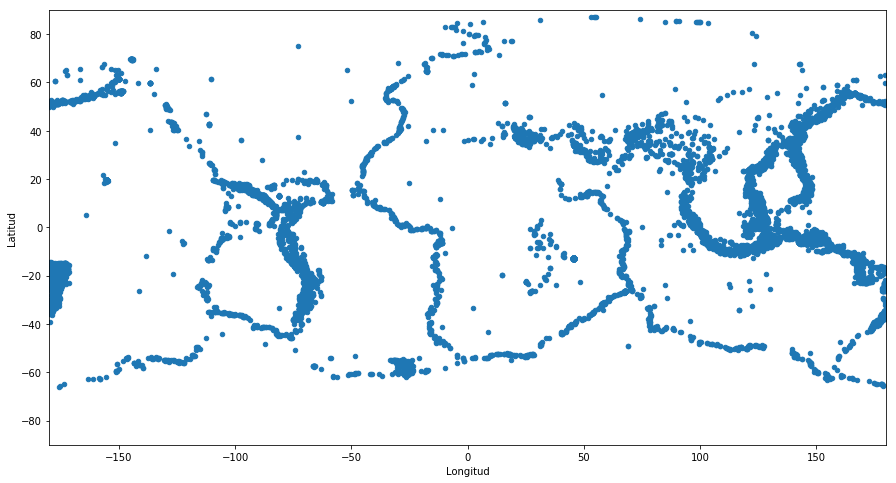

In [32]:
import seaborn as sns
#terremotos en el mundo
fig, ax = plt.subplots(figsize=(15,8))
terremotos.plot(ax=ax, kind='scatter', x='longitude',y='latitude', xlim=[-180,180], ylim=[-90,90])
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

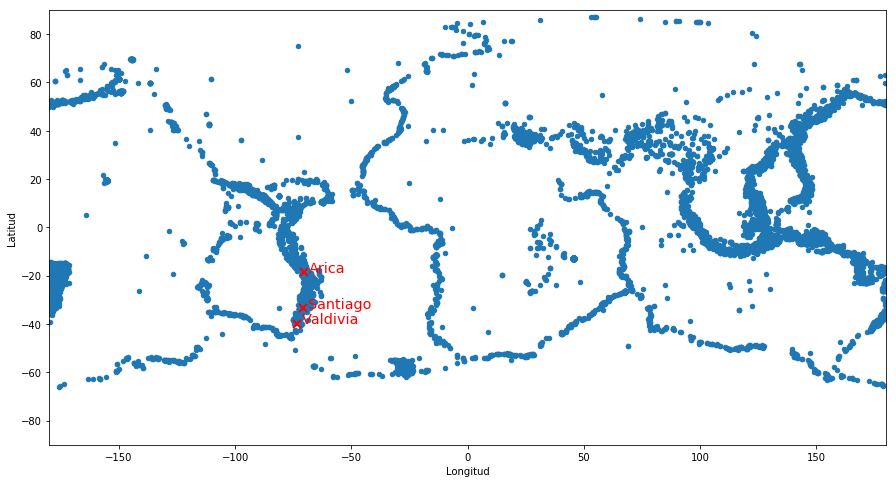

In [33]:
data={'name':['Arica','Santiago','Valdivia'],
      'latitude':[-18.4783,-33.4489,-39.8196],
      'longitude':[-70.3126,-70.6693,-73.2452]}
city = pd.DataFrame(data, columns=['name', 'latitude', 'longitude'])
for i in range(len(city.index)):
    ax.plot(city['longitude'][i], city['latitude'][i], marker='x', color='red', ms=8, mew=2)
    ax.text(city['longitude'][i]+2, city['latitude'][i], city['name'][i], horizontalalignment='left', color='red', size='x-large')
fig

In [37]:
import gmaps
import gmaps.datasets
#conda install -c conda-forge gmaps
#conda install -c conda-forge/label/gcc7 gmaps
#conda install -c conda-forge/label/cf201901 gmaps 
#Follow the instructions in the following link to obtain a Google API key http://jupyter-gmaps.readthedocs.io/en/latest/authentication.html
#gmaps.configure(api_key="")

#m = gmaps.Map()

#data_gmaps=np.asarray(terremotos[['latitude','longitude','mag']]).tolist()
#m.add_layer(gmaps.WeightedHeatmap(data=data_gmaps))
#m
#hay que configurar una api key de google

Text(848.429,0.5,'Latitud')

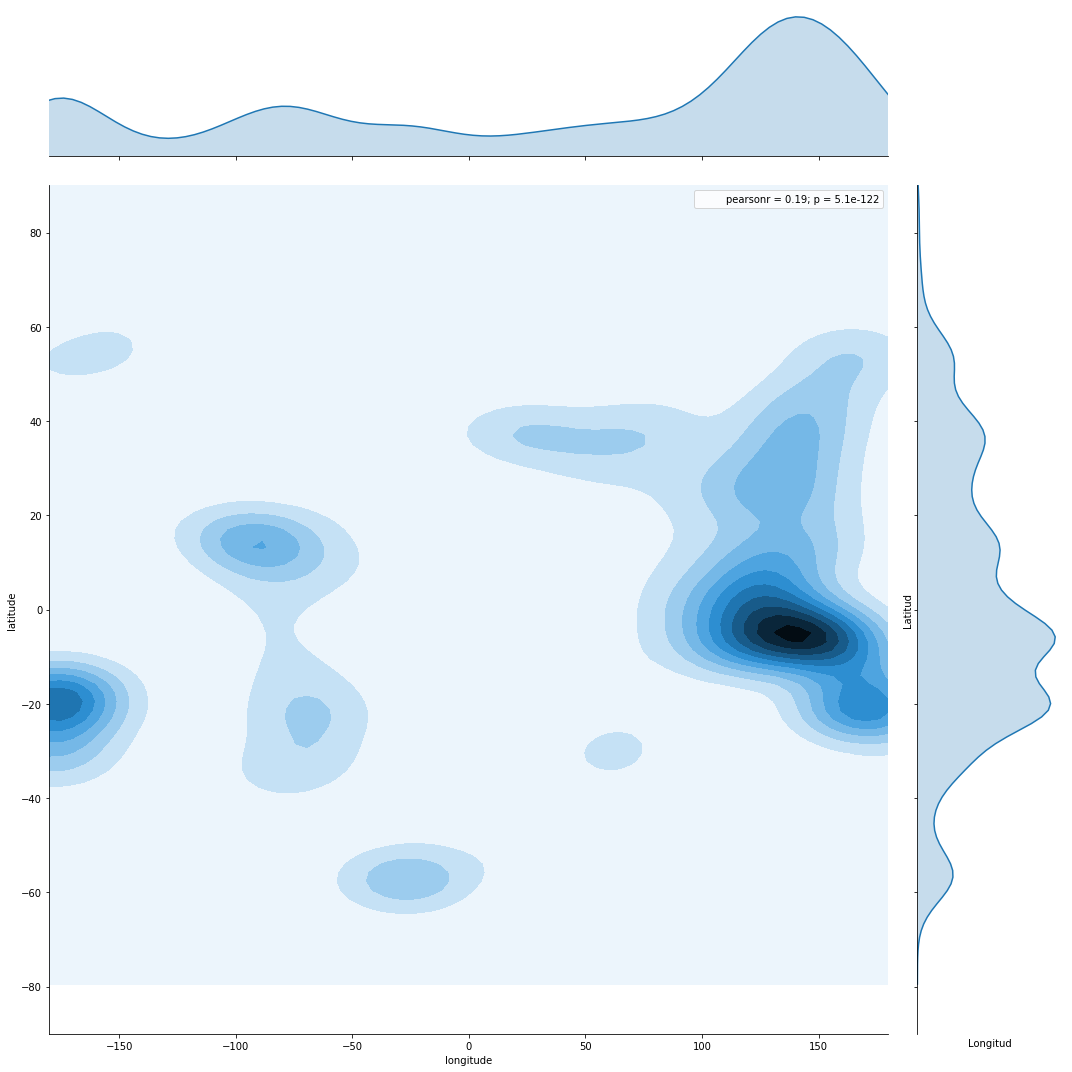

In [39]:
#fig, ax = plt.subplots(figsize=(16,10))
sns.jointplot(x='longitude', y='latitude', data=terremotos, kind="kde", xlim=[-180,180], ylim=[-90,90], size=15, ratio=5)
#sns.heatmap(earthquake[['latitude','longitude']])
#earthquake.plot(ax=ax, kind='scatter', x='longitude',y='latitude', xlim=[-180,180], ylim=[-90,90])
plt.xlabel('Longitud')
plt.ylabel('Latitud')